# 1. Comparación de sistemas lineales vs. no lineales

| Característica                    | Lineal                                      | No lineal (SIR)                                      |
|-----------------------------------|---------------------------------------------|------------------------------------------------------|
| **Ecuación básica**               | $$\frac{dI}{dt} = \mu\,I$$                 | $$\frac{dI}{dt} = \beta\,S\,I \;-\;\mu\,I$$          |
| **Principio de superposición**    | Válido: la suma de soluciones es solución.  | No válido: no se pueden sumar soluciones arbitrarias.|
| **Escalabilidad**                 | Escala horaria uniforme: si $$t\mapsto I(t)$$ es solución, $$I(at)$$ también lo es. | Dependiente de $$S(t)$$; cambiar escala rompe la dinámica. |
| **Solución analítica**            | Disponible en forma cerrada:  
$I(t)=I_0 e^{\mu t}$              | Generalmente no hay solución cerrada → requiere simulación numérica. |
| **Respuesta a perturbaciones**    | Siempre exponencial; sin saturación ni umbrales. | Puede presentar **umbrales** (p.ej. $$R_0=1$$), saturación y puntos de inflexión. |
| **Dinámica temporal**             | Monótona (crece o decae).                   | Pico epidémico y fase de declive: curva con máximo.  |
| **Estabilidad de equilibrio**     | Único equilibrio en $$I=0$$ (estable si $$\mu<0$$). | Múltiples equilibria (sano vs. endémico) y cambio de estabilidad según $$R_0$$. |
| **Aplicaciones típicas**          | Modelos de crecimiento/decadencia simple (radioactividad, población sin límite). | Modelado de epidemias, sistemas con interacción “agente–medio”. |
| **Requerimiento computacional**   | Bajo: basta fórmula analítica.              | Medio/alto: integración numérica (Euler, Runge–Kutta). |
| **Comportamientos emergentes**    | Ninguno: no aparece dinámica compleja.      | Oscilaciones suaves, umbrales críticos, posibles bifurcaciones en extensiones (SIRS, SEIR). |




---

# 2. Fuerza de infección $$\lambda$$

Se define como  
$$
\lambda = \frac{\beta\,c\,I}{N}
$$

- **Riesgo por susceptibilidad**  
  Es la probabilidad instantánea de que un individuo susceptible se infecte.

- **Tasa de propagación por infección**  
  Es el número de nuevos casos por infectado y por unidad de tiempo, ajustado al tamaño de la población.

---

# 3. Por qué simular sistemas no lineales

- **Ausencia de soluciones cerradas**  
  La dependencia mutua de las variables (S, I, R) impide casi siempre resolver analíticamente.

- **Dinámicas complejas**  
  Pueden surgir bifurcaciones, picos, oscilaciones o comportamientos caóticos.

- **Métodos numéricos**  
  Se usan esquemas como Euler o Runge–Kutta para aproximar la evolución en el tiempo.

---

# 4. Modelo SIR con $$R_0 = 3$$

## a. ¿Qué es $$R_0$$?

El **número reproductivo básico** $$R_0$$ es  
$$
R_0 = \frac{\beta\,S_0}{\mu}
$$  
y representa el número promedio de casos secundarios generados por un infectado en población totalmente susceptible.

## b. Umbral de inmunidad de grupo

El umbral crítico $$p_c$$ es  
$$
p_c = 1 - \frac{1}{R_0}
\quad\Longrightarrow\quad
p_c = 1 - \frac{1}{3} = \frac{2}{3} \approx 66.7\%
$$

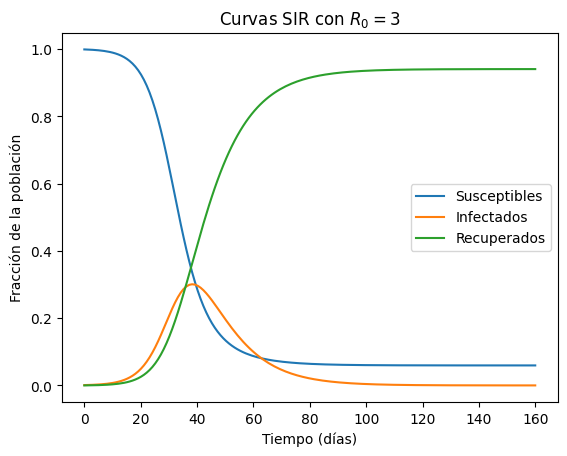

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parámetros
R0 = 3
mu = 1/10          # tasa de recuperación
beta = R0 * mu     # tasa de transmisión
N = 1.0            # población normalizada
I0, R0_init = 1e-3, 0.0
S0 = N - I0 - R0_init
t = np.linspace(0, 160, 160)

# Ecuaciones SIR
def sir(y, t, beta, mu):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt =  beta * S * I - mu * I
    dRdt =  mu * I
    return dSdt, dIdt, dRdt

# Simulación
y0 = S0, I0, R0_init
sol = odeint(sir, y0, t, args=(beta, mu))
S, I, R = sol.T

# Gráfica
plt.plot(t, S, label='Susceptibles')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.xlabel('Tiempo (días)')
plt.ylabel('Fracción de la población')
plt.legend()
plt.title('Curvas SIR con $R_0=3$')
plt.show()

## d. ¿Por qué el término $ \beta S I$ crea puntos de inflexión?

El término $ \beta S I$ es **no lineal** porque depende del producto de dos variables dinámicas, $S$ e $I$.

1. **Fase de aceleración**  
   Al inicio de la epidemia, $S$ es alto y el número de infectados crece rápidamente. La ecuación  
   $$
   \frac{dI}{dt} = \beta\,S\,I \;-\; \mu\,I
   $$  
   tiene segunda derivada positiva, $\ddot I > 0$, por lo que la curva de $I(t)$ se **concavea hacia arriba**.

2. **Fase de desaceleración**  
   A medida que $S$ disminuye, el término $\beta\,S\,I$ deja de aumentar aunque $I$ siga siendo grande. En ese punto:  
   - $\dot I$ alcanza su **máximo**.  
   - $\ddot I$ cambia de signo, pasando a $\ddot I < 0$, marcando el **punto de inflexión** en $I(t)$.

3. **Interpretación**  
   - La fuerza de infección $\beta\,S\,I$ es máxima cuando la interacción entre susceptibles e infectados es mayor.  
   - Cuando el número de susceptibles se reduce, la retroalimentación positiva se atenúa, provocando el pico epidémico y el cambio de concavidad.

En resumen, la no linealidad del término $ \beta S I$ genera una fase inicial de aceleración y una fase posterior de desaceleración, definidas por puntos de inflexión en la curva de infectados.
